In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("weather.csv")
print(df.head())

   Data.Precipitation   Date.Full  Date.Month  Date.Week of  Date.Year  \
0                0.00  2016-01-03           1             3       2016   
1                0.00  2016-01-03           1             3       2016   
2                0.16  2016-01-03           1             3       2016   
3                0.00  2016-01-03           1             3       2016   
4                0.01  2016-01-03           1             3       2016   

  Station.City Station.Code Station.Location Station.State  \
0   Birmingham          BHM   Birmingham, AL       Alabama   
1   Huntsville          HSV   Huntsville, AL       Alabama   
2       Mobile          MOB       Mobile, AL       Alabama   
3   Montgomery          MGM   Montgomery, AL       Alabama   
4    Anchorage          ANC    Anchorage, AK        Alaska   

   Data.Temperature.Avg Temp  Data.Temperature.Max Temp  \
0                         39                         46   
1                         39                         47   
2    

In [23]:
df.columns

Index(['Data.Precipitation', 'Date.Full', 'Date.Month', 'Date.Week of',
       'Date.Year', 'Station.City', 'Station.Code', 'Station.Location',
       'Station.State', 'Data.Temperature.Avg Temp',
       'Data.Temperature.Max Temp', 'Data.Temperature.Min Temp',
       'Data.Wind.Direction', 'Data.Wind.Speed'],
      dtype='object')

In [31]:
# checking for null values
df.isnull().sum()

Data.Precipitation           0
Date.Full                    0
Date.Month                   0
Date.Week of                 0
Date.Year                    0
Station.City                 0
Station.Code                 0
Station.Location             0
Station.State                0
Data.Temperature.Avg Temp    0
Data.Temperature.Max Temp    0
Data.Temperature.Min Temp    0
Data.Wind.Direction          0
Data.Wind.Speed              0
dtype: int64

In [35]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df[['Date.Year']]
y = df['Data.Temperature.Avg Temp']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

LinearRegression()

In [39]:
# Predict the temperature for the test set
y_pred = model.predict(X_test)

# Display the predictions and actual values
print(f"Predicted temperatures: {y_pred}")
print(f"Actual temperatures: {y_test.values}")

Predicted temperatures: [56.32032854 56.32032854 56.32032854 ... 56.32032854 56.32032854
 56.32032854]
Actual temperatures: [84 42 61 ... 32 84 36]


In [41]:
from sklearn.metrics import mean_squared_error

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 351.2216194592794


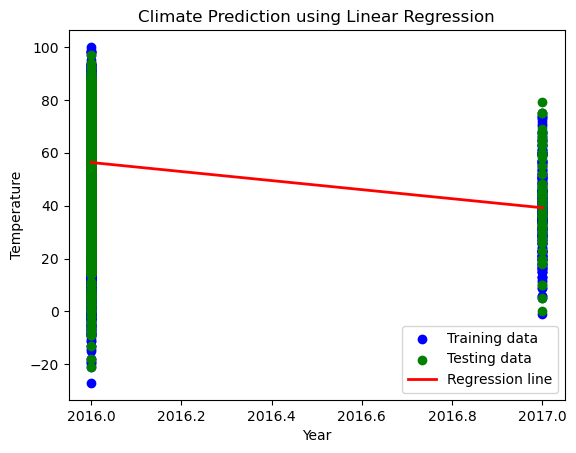

In [43]:
import matplotlib.pyplot as plt

# Plot the results
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='green', label='Testing data')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression line')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Climate Prediction using Linear Regression')
plt.legend()
plt.show()